# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [1]:
# Import of Packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Importing the Functions File
import Functions as fn

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [2]:
# Reading the excel file
df = pd.read_excel("Sample.xlsx")
# print(df)

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [3]:
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Ploting them

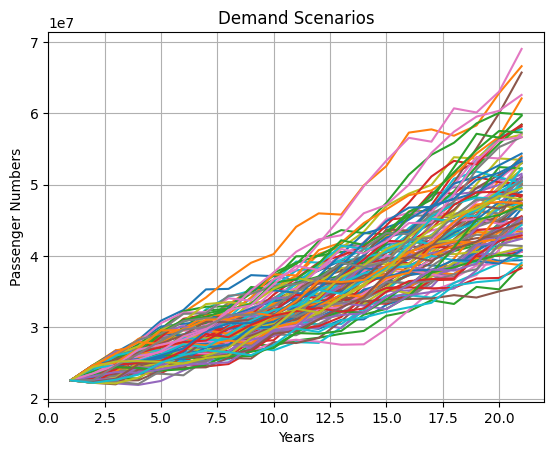

<Figure size 640x480 with 0 Axes>

In [4]:
# Demand at t0
Dt0 = 22561132
# Steptime [Years]
dt = 1
# Time Horizon of Forecasts
Fth = 21
# Number of Forecasts
Forecasts = 100

# Callint the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)

# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, "Demand Scenarios")

## Calculation of the Traditional NPV


Inputs for NPV Calculation

In [5]:
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

D = Scenario  # Assinging the Scenarios as Demand
D_rounded = np.round(D / 1000000)

Exporting Data

In [6]:
df2 = pd.DataFrame(D)
excel_file = "output.xlsx"
df2.to_excel(excel_file, index=False)

Creation of a mean Capacity Estimation

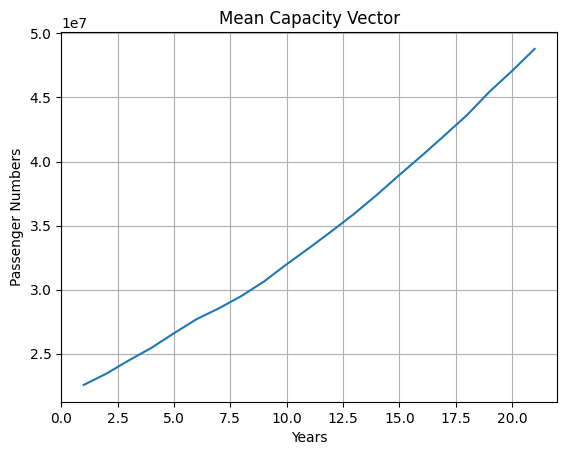

<Figure size 640x480 with 0 Axes>

In [7]:
# Calculate a Mean Scenario as Estimation Vector
meansvalues = np.mean(Scenario, axis=0)

# Assinging the Mean Sceanrio as Capacity Vector
capacity_vector = meansvalues
fn.Scenario_plot(capacity_vector, Fth, "Mean Capacity Vector")

Creation of a Staircase Vector based on the Capacity Estimation

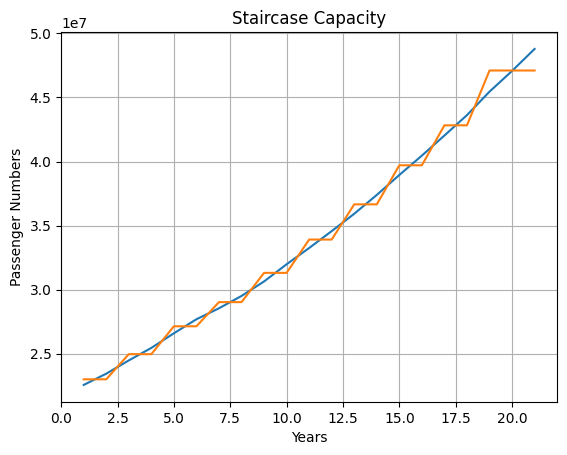

<Figure size 640x480 with 0 Axes>

In [8]:
# Number of Capacity Changes
num_steps = 10
# Qunatify the nonlinear Capacity Vector into a Step Vector
bin_size = len(capacity_vector) // num_steps
staircase_vector = np.zeros(len(capacity_vector))
for i in range(num_steps):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size
    if i == num_steps - 1:
        end_idx = len(capacity_vector)
    avg_value = np.mean(capacity_vector[start_idx:end_idx])
    staircase_vector[start_idx:end_idx] = avg_value

K_est = staircase_vector[1:]
K_est_rounded = np.ceil(K_est / 1000000)

Capacity_plot = np.array([capacity_vector, staircase_vector])
fn.Scenario_plot(Capacity_plot, Fth, "Staircase Capacity")

Calling the NPV Calculation Function

In [9]:
# To compare with Excel -> We define same Capacity Vector
K_excel_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

Fth = 20
# df = pd.read_excel("output.xlsx")
# D = np.array(df)
D_excel = D[:, 1:]
D_excel_rounded = np.ceil(D_excel / 1000000)

In [10]:
NPV_excel = fn.NPV_Calculation(D_excel_rounded, K_excel_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_excel)

Traditional NPVs =  [11380706.79392359 11516809.14551448  8673416.58202992 10586633.41609411
 11043860.40604249  9708181.00797614  9702996.71408713  8969168.17139957
  9969888.82659867 10755709.64933038  8906182.27907613 13425111.36480875
  9640475.90379417 10547915.79039096  9850273.70519848 10915876.57037729
  9959966.06799108 11207705.81792643  9850615.49687318 11365035.40743068
  7933462.12168204  9666045.25541357  7046720.74442679  9590769.21625079
  8765250.13695922  9554710.63213051 11088641.27365199  9127713.72678391
 10100193.22528658  8238597.94086232  8941081.55461257  9114518.21146015
 11571206.56852809  8997324.37219925  8246553.69423113  9111889.59334601
  7116357.89974364  9016386.77195417 11470597.00319019 11376890.98118621
  9569388.56272067  9732791.38601655 12087311.12330325  8645384.26987739
  8748306.24585758 10754997.52053818 11470901.99537302  8534380.99316337
  8577599.60616878  8225153.64201632 10961085.09987097  8781895.19156535
 12465697.70547558 11866884.653

Calculating the ENPV

In [11]:
ENPV_excel = np.mean(NPV_excel)
print("Traditional ENPV = ", ENPV_excel)

Traditional ENPV =  9772982.368561676


In [12]:
D_est_rounded = D_rounded[:, 1:]
NPV_est = fn.NPV_Calculation(D_est_rounded, K_est_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_est)

ENPV_est = np.mean(NPV_est)
print("Traditional ENPV = ", ENPV_est)

Traditional NPVs =  [11522612.71573997 11477823.28512408  8999315.37451519 10552397.36839075
 11120389.96732172 10050482.55599511  9970851.79427076  9510304.83314561
 10195459.74679922 10928406.99164254  9372361.34947325 13289227.11167288
 10041583.40289303 10492535.55563619 10065555.67226591 11080009.06952843
 10414074.42179414 11347948.47350346 10459424.12911312 11368867.25952077
  8207911.18386544  9855818.1261026   7440487.85580412  9844843.44298011
  9188824.03676311  9886028.10309791 11301245.52202108  9519015.05218393
 10443641.68832079  8469633.37691329  9395468.09205426  9438791.56407885
 11568450.23105781  9282576.86254985  8602481.66165503  9534268.80732937
  7350143.78136027  9367375.19178845 11512560.71148506 11507297.06585935
 10074692.14846106 10202333.41353158 12079500.99011342  9157020.01466605
  9013090.86625771 10827479.28774355 11427168.08115531  8811196.19568049
  8908594.30764739  8611805.74549795 11074388.42884242  9224278.88870287
 12306262.65430183 11805789.716

## Creating a Flexible Capacity Vector

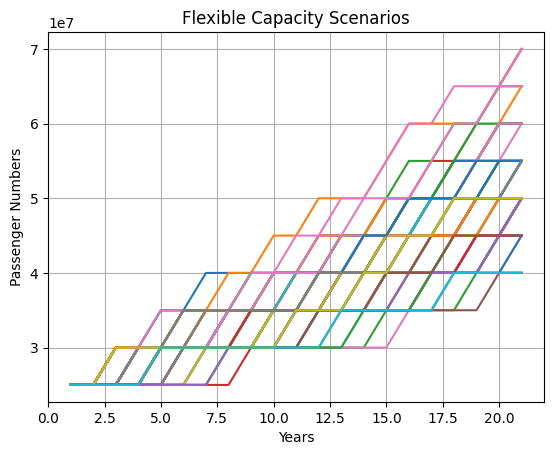

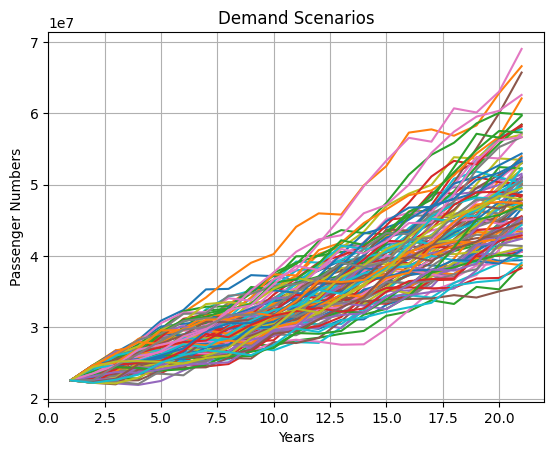

<Figure size 640x480 with 0 Axes>

In [13]:
# Initial Capacity
K0 = 25000000

# D = D * 1000000

# Capacity Increase Vector
deltaK_Flex = [5000000, 10000000, 20000000]

Flexible_Capacity = fn.Decision_Rule(D, K0, deltaK_Flex)

Fth = 21
fn.Scenario_plot(Flexible_Capacity, Fth, "Flexible Capacity Scenarios")
fn.Scenario_plot(D, Fth, "Demand Scenarios")

## Calculation of NPV using the Flexible Capacity Vector

In [14]:
NPV_flex = []
Flexible_Capacity = np.ceil(Flexible_Capacity / 1000000)
# D_rounded = np.ceil(D / 1000000)
for liste in range(Flexible_Capacity.shape[0]):
    result = fn.NPV_Calculation(D_rounded, Flexible_Capacity[liste], Fth, dt)
    NPV_flex.append(result[liste])
print("Flexible NPVs = ", NPV_flex)

Flexible NPVs =  [10492623.22730582, 10343345.111813232, 9049863.458675615, 10182659.43758024, 10150468.745985107, 9647257.472817533, 9652246.641690705, 9459248.524307018, 9781303.348392792, 10182633.930083677, 9461550.202395612, 12394543.816461328, 9469543.45718328, 9841562.976076886, 9553115.27035647, 10079606.454430345, 9786455.316249482, 10382215.769934366, 10061067.07521051, 10552992.458308116, 8669708.482136443, 9306307.009696247, 8324041.944439847, 9322942.094910022, 9382023.407888666, 9680347.512126239, 10498762.800468275, 9402736.301467981, 9874971.89331997, 8694717.838053148, 9303738.971998189, 9562446.196723776, 10480954.018518358, 9070422.4228754, 8840943.833977869, 9423395.054502523, 8247166.610996285, 9222471.098796414, 10853385.410407124, 10590362.710268212, 9750128.571990032, 9827923.18489894, 11290796.313046934, 9405704.493052717, 9062719.312996615, 10393576.44378295, 10544796.34634272, 9126735.206690915, 8881298.499176716, 8832481.145428063, 10382168.27065728, 9333793

Calculating the new ENPV

In [15]:
ENPV_flex = np.average(NPV_flex)
print("Traditional ENPV = ", ENPV_est)
print("Flexible ENPV = ", ENPV_flex)

Traditional ENPV =  10033102.927996498
Flexible ENPV =  9712775.462807477


## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

In [16]:
# # Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# # data)

# plt.plot(
#     Year,
#     Historic_Demand,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Demand for Zurich Airport")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Annual_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Percentage Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand Excluding Outlayers")
# plt.legend()  # Display legend
# plt.figure()